## Importing libraries for all the tasks

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy  as np

## Task 1: Decision Tree & Random Forest

#### MNIST dataset

The datasets module in keras provide a few toy datasets (already-vectorized, in Numpy format) that can be used for debugging a model or creating simple code examples.

Here, we use `keras.datasets` to import `mnist.`

Explore other datasets provided by this keras module.

Other libraries, such as, sklearn, pytorch, tensorflow (keras is now integrated as a submodule of tensorflow itself, tf.keras), also provide famous datasets for fast loading and testing.

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


The ground truth for the image at index 4616 is : 4
Total number of examples for digit 4 in training set are: 5842


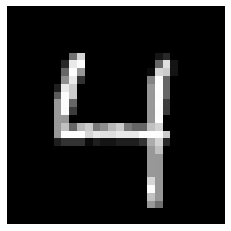

In [ ]:
# Following few lines are given here to give you headstart for analyzing the loaded mnist dataset
# Run them multiple times and make your observations

num= np.random.randint(0, x_train.shape[0])
plt.imshow(x_train[num],cmap='gray')
plt.axis('off')
print('The ground truth for the image at index {} is : {}'.format(num,y_train[num]))
print('Total number of examples for digit {} in training set are: {}'.format(y_train[num], (y_train==y_train[num]).sum()))

`The mnist function loads the datset from keras.datsets. This dataset consists of handwritten single digits from 0 to 9.`

`The np.random.randint generates a random integer in the range of 0 to the number of images present in the dataset.`

`The ground truth refers to the actual classification of the image to the digit. Every time the above code is run, it outputs an image from the dataset, gives its ground truth and the number of images present in the dataset for that digit.`

#### Ques. 2(a) Dataset Analysis

Describe briefly about mnist dataset and the data stored in *x_train, y_train, x_test, y_test*. What does train set and test set signify?

Make a bar plot showing the distribution of digits classes vs number of examples included in mnist dataset for both training set and testing set.

In [ ]:
## Write code here.
x_train = x_train.reshape((x_train.shape[0], 28*28)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28*28)).astype('float32')

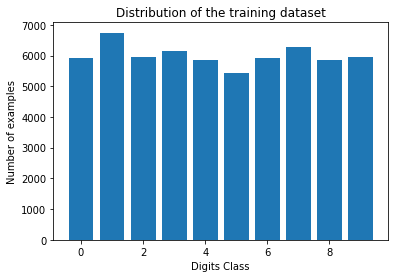

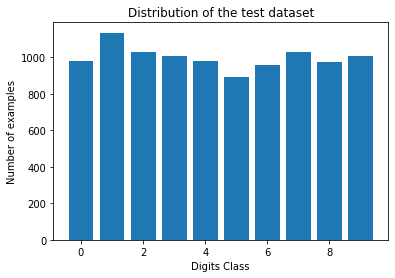

In [ ]:
train_samples = []
test_samples = []
classes = np.unique(y_train)
for j in classes:
  train_samples.append(len(x_train[y_train == j]))
  test_samples.append(len(x_test[y_test == j]))
plt.bar(classes, train_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Digits Class")
plt.ylabel("Number of examples")
plt.show()
plt.bar(classes, test_samples)
plt.title("Distribution of the test dataset")
plt.xlabel("Digits Class")
plt.ylabel("Number of examples")
plt.show()

**Write your analysis of dataset in this markdown**

`The mnist function loads the datset from keras.datsets. This dataset consists of handwritten single digits from 0 to 9. `


---



`The data type of the data is numpy.ndarray i.e. the handwritten digit images are stored in the form tuples. The shape of X is (70000, 28, 28) which has been divided into training and testing data (approximately 85% and 15%): x_train(60000, 28, 28) and x_test(10000, 28, 28). This shape of X means that there are 70000 grayscale images in total, each image of size 28pixels x 28pixels (784 pixels total). There are 10 digits (0 to 9) or classes, the images can be classified to, these labels are in Y (y_train and y_test). `


---

`Dividing the dataset into training and testing dataset ensures us that the model is trained on a part of data and tested on a completely unknown part of the data. Moreover, it is divided such that all the model is trained according to all the classes and features.`


---


`As we can see from the plots above, the distribution of samples among the different classes/digits is approximately the same in training and testing dataset.`



#### Question 2(b) : **Decision tree** and **Random Forest**

Train both classifiers and Report the following for each class in testing and training set:


1.   True positive
2.   True Negative
3.   Accuracy
4.   Precision
5.   Recall
6.   F1 score

Finally, Report the following for overall train set and test set in mnist dataset:

1.   Accuracy
2.   Precision
3.   Recall
4.   F1 *score*

Go through provided class snippet `gen_classifier` and modify as required.


In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
class gen_classifier(object):
  def __init__(self, x_train, x_test, y_train, y_test):
    self.x_train=x_train
    self.x_test=x_test
    self.y_train=y_train
    self.y_test=y_test
    self.seed = 1000 # For reproducibility
    self.unique_classes= np.unique(y_train)

  def fit_decision_tree_classifier(self):
    #####
    # Add code here to train/fit decision tree on mnist
    clf_dt = tree.DecisionTreeClassifier()
    clf_dt = clf_dt.fit(self.x_train, self.y_train)
    return clf_dt

  def fit_random_forest_classifier(self):
    #####
    # Add code here to train/fit random forest on mnist
    clf_rf=RandomForestClassifier()
    clf_rf = clf_rf.fit(self.x_train, self.y_train)
    return clf_rf

  def clf_predict(self,trained_clf=None):
    ### Use your trained classifier to make predictions
    ### Replace following hard coded lines with your code
    y_pred_train = trained_clf.predict(self.x_train)
    y_pred_test = trained_clf.predict(self.x_test)
    ####
    return y_pred_train, y_pred_test, self.y_train, self.y_test

  def per_class_metrics(self, y_true, y_pred, classifier_name=None, split=None):
    TP=[]
    TN=[]
    Accuracy=[]
    Precision=[]
    Recall=[]
    F1score=[]
    Label=[]

    for label in self.unique_classes:
      # Write code here that calculates the following for current label and assigns the values in variable named = (tp,tn,acc,prec,recall, f1)
      ###################
      # Your code here
      # For example, hard coded to 0:
      tp = 0
      tn= 0
      fp = 0
      fn = 0
      for i in range(len(y_true)):
          if y_pred[i] == label and y_true[i] == label:
              tp = tp+ 1
          elif y_pred[i] == label and y_true[i] != label:
              fp =fp + 1
          elif y_pred[i] != label and y_true[i] == label:
              fn =fn + 1
          else:
              tn = tn+1
      acc = (tp+tn)/float(tp+fp+fn+tn)
      prec = tp/ float(tp+fp)
      rec = tp / float(tp+fn)
      f1= (2*prec*rec)/(prec+rec)
      ##########################

      TP.append(tp)
      TN.append(tn)
      Accuracy.append(acc)
      Precision.append(prec)
      Recall.append(rec)
      F1score.append(f1)
      Label.append(label)

    clf_name=classifier_name
    text=''
    for idx in range(len(Label)):
      text += 'For class : {}, Following are the metrics with {} on {} set\nTrue Positive : {}\nTrue Negative : {}\nAccuracy : {}\nPrecision : {}\nRecall : {}\nF1score : {}\n\n'.format(Label[idx],clf_name, split ,TP[idx],TN[idx],Accuracy[idx],Precision[idx],Recall[idx],F1score[idx])
    print(text)


  def overall_metrics(self, y_true, y_pred,classifier_name=None, split=None):
    # Write code here that calculates the following and assigns the values in variable named = (tp,tn,acc,prec,recall, f1)
    ###################
    TP=[]
    TN=[]
    Accuracy=[]
    Precision=[]
    Recall=[]
    F1score=[]
    Label=[]
    FP=[]
    FN=[]

    for label in self.unique_classes:
      # Write code here that calculates the following for current label and assigns the values in variable named = (tp,tn,acc,prec,recall, f1)
      ###################
      # Your code here
      # For example, hard coded to 0:
      tp = 0
      tn= 0
      fp = 0
      fn = 0
      for i in range(len(y_true)):
          if y_pred[i] == label and y_true[i] == label:
              tp = tp+ 1
          elif y_pred[i] == label and y_true[i] != label:
              fp =fp + 1
          elif y_pred[i] != label and y_true[i] == label:
              fn =fn + 1
          else:
              tn = tn+1
      acc = (tp+tn)/float(tp+fp+fn+tn)
      prec = tp/ float(tp+fp)
      rec = tp / float(tp+fn)
      f1= (2*prec*rec)/(prec+rec)
      ##########################
      FN.append(fn)
      FP.append(fp)
      TP.append(tp)
      TN.append(tn)
      Accuracy.append(acc)
      Precision.append(prec)
      Recall.append(rec)
      F1score.append(f1)
      Label.append(label)
    # Your code here
    # For example, hard coded to 0:
    tp = np.average(TP)
    tn= np.average(TN)
    acc = float(sum(y_true==y_pred) / (len(y_true)))
    prec = np.average(Precision)
    rec = np.average(Recall)
    f1= np.average(F1score)
    ##########################
    clf_name=classifier_name
    text = 'Following are the metrics for {} on {} set:\nTrue Positive : {}\nTrue Negative : {}\nAccuracy : {}\nPrecision : {}\nRecall : {}\nF1score : {}\n\n'.format(clf_name, split ,tp,tn,acc,prec,rec,f1)
    print(text)

Use the created class now to report results on loaded mnist dataset.

Instantiation of class by `gen_classifier(x_train,x_test,y_train,y_test)`, provided `x_train,x_test,y_train,y_test`, same class can be used to evaluate the learning ability of theses algorithms on other datasets also. Apart from assigned work on MNIST, try experimenting with other datasets for better understanding.


A demo of usage is provided below.

In [ ]:
# Instantiate class
clf = gen_classifier(x_train,x_test,y_train,y_test)

# Use the created methods
dtree=clf.fit_decision_tree_classifier()   ## Edit this method to train Decision tree
rf = clf.fit_random_forest_classifier()    ## Edit this method to train Random forest

# Make predictions by passing desired classifier to clf_predict method. First Edit the method to make predictions.
y_pred_train_dt, y_pred_test_dt, y_true_train_dt, y_true_test_dt= clf.clf_predict(trained_clf=dtree)
y_pred_train_rf, y_pred_test_rf, y_true_train_rf, y_true_test_rf= clf.clf_predict(trained_clf=rf)


In [ ]:
# Use following methods to calculate per class metrics. First Edit per_class_metrics and overall_metrics methods of gen_classifier class.
clf.per_class_metrics(y_true_test_dt,y_pred_test_dt,classifier_name='Decision Tree', split= 'test')

# Use following methods to calculate overall metric
clf.overall_metrics(y_true_train_rf,y_pred_train_rf,classifier_name='Random forest', split= 'train')

For class : 0, Following are the metrics with Decision Tree on test set
True Positive : 919
True Negative : 8940
Accuracy : 0.9859
Precision : 0.91991991991992
Recall : 0.9377551020408164
F1score : 0.9287518948964124

For class : 1, Following are the metrics with Decision Tree on test set
True Positive : 1086
True Negative : 8812
Accuracy : 0.9898
Precision : 0.9534679543459175
Recall : 0.9568281938325991
F1score : 0.9551451187335093

For class : 2, Following are the metrics with Decision Tree on test set
True Positive : 881
True Negative : 8829
Accuracy : 0.971
Precision : 0.8637254901960785
Recall : 0.8536821705426356
F1score : 0.8586744639376218

For class : 3, Following are the metrics with Decision Tree on test set
True Positive : 854
True Negative : 8818
Accuracy : 0.9672
Precision : 0.8323586744639376
Recall : 0.8455445544554455
F1score : 0.8388998035363457

For class : 4, Following are the metrics with Decision Tree on test set
True Positive : 855
True Negative : 8890
Accuracy 

#### Ques. 2(c) : **Confusion matrix**

Plot confusion matrix for both the classifiers and provide an explanation on the difference between the two matrices.

[[ 919    1    7    6    4   14   10    4    8    7]
 [   1 1086    9    7    2    5    7    2   13    3]
 [  10    9  881   32   15   13   13   25   25    9]
 [   6    6   34  854    8   44    3    7   30   18]
 [   6    4   13    8  855    8   16   10   19   43]
 [  14    5    5   41   10  742   19    3   34   19]
 [  15    4   10    6   18   19  855    1   27    3]
 [   3   11   26   17    9    8    3  925    7   19]
 [  12    8   28   38   20   28   20   10  785   25]
 [  13    5    7   17   42   12    6   24   26  857]]


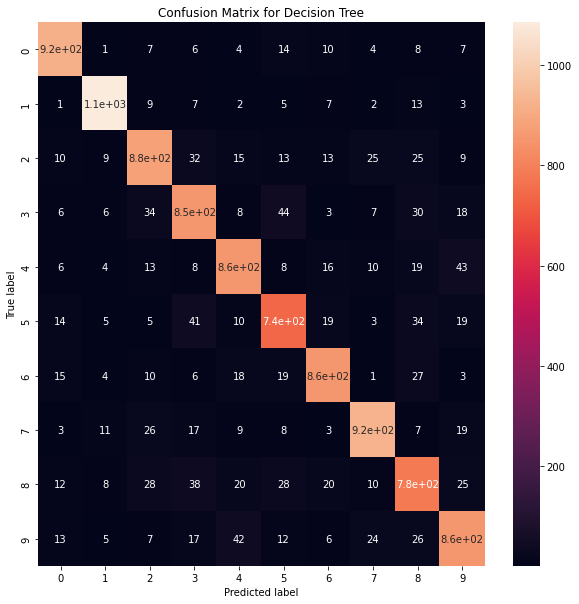

In [ ]:
# Create a plot for confusion matrix for decision tree and random forest.
# Write your code here
# decision tree
cmdt = confusion_matrix(y_true_test_dt,y_pred_test_dt)
print(cmdt)
dt_cm = pd.DataFrame(cmdt, index = range(10), columns =  range(10))
plt.figure(figsize = (10,10))
sn.heatmap(dt_cm, annot=True)
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

[[ 971    1    0    0    0    2    2    1    3    0]
 [   0 1121    2    5    0    2    3    1    1    0]
 [   6    0 1001    5    2    0    3    8    6    1]
 [   0    0    9  971    0   10    0    8    9    3]
 [   0    0    1    0  954    0    4    1    3   19]
 [   3    0    3   14    2  856    4    2    6    2]
 [   7    3    1    0    5    5  933    0    4    0]
 [   1    4   19    2    1    0    0  988    2   11]
 [   4    0    5    7    4    8    2    4  931    9]
 [   7    5    1   11   11    3    1    4    7  959]]


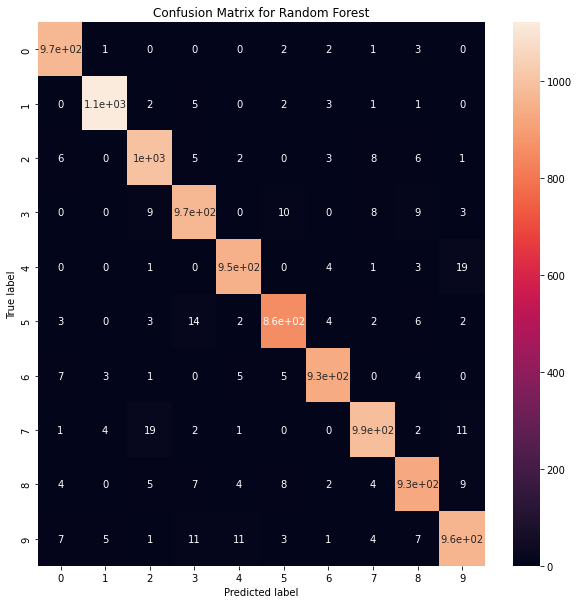

In [ ]:
#random forest
cmrf = confusion_matrix(y_true_test_rf,y_pred_test_rf)
print(cmrf)
rf_cm = pd.DataFrame(cmrf, index = range(10), columns =  range(10))
plt.figure(figsize = (10,10))
sn.heatmap(rf_cm, annot=True)
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Write comparative analysis between the obtained confusion matrices in this mark down**

`It can be analysed from both the heat maps that the accuracy of Random Forest is much better than that of decision tree model. This can be seen from the number of samples having "predicted label" not equal to "true label" which is clearly bigger in case of decision tree confusion matrix. Also, the number of samples being predicted the same as their true label is greater in random forest model. The reason for this can be because random forest prevents overfitting and gives output on combining a group of decision trees.`



## Task 2: ScratchWorld

<font size="3"> Welcome to **ScratchWorld** where in order to survive you have to write codes from scratch. Luxuries like pytorch, tensorflow, some part of sklearn does not exsist in this world. Your task is to help our friend Saitama to reach top rank in S class of hero association by solving certain problem that association has sent him for intelligence test. Hero association have one strict rule "**write some part of the code from scratch**". Help Saitama by solving following task, where he has to **implement K-Nearest Neighbour algorithm from scratc**h. <br/>
Story to be continued, going to be more fun in future....
</font>
* One punch man [[Link](https://onepunchman.fandom.com/wiki/One-Punch_Man_Wiki)]

### KNN (K-Nearest Neighbor) [Link: [1](https://www.wikiwand.com/en/K-nearest_neighbors_algorithm), [2](https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning), [3](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)]

##### Loading dataset

In [ ]:
mnist = None

In [ ]:
# Prevent data from reloading, takes 3-4 minutes for downloading the dataset
if mnist is None:
    _      = 1000
    mnist  = fetch_openml('mnist_784')
    digits = mnist.data # Digitis: (70000, 784)
    labels = mnist.target # Labels: (70000,)
    digits = digits[:_].to_numpy() # For assignment purpose we are considering only first 1000 data
    labels = labels[:_].to_numpy() # For assignment purpose we are considering only first 1000 data

##### Code

In [ ]:
# Train (80%) - Test (20%) Split
# You can use sklearn train_test_split method, set random_state=45,
# must set stratify to labels for balance data split

# Write your code below this
X_train, X_test, Y_train, Y_test = train_test_split(digits, labels, test_size=0.2, random_state=45, stratify=labels)

In [ ]:
Y_test.shape

(200,)

In [ ]:
# Function that implement k-NN algorithm
from scipy.stats import mode
from sklearn.metrics import accuracy_score

#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

def algo_knn(x_test, x_train, y_train, k=3):
    # Write the code below this
    labels = []
    for i in x_test:
      distances = []
      for j in range(len(x_train)):
        dist = eucledian(np.array(x_train[j,:]),i)
        distances.append(dist)
      distances = np.argsort(np.array(distances))[:k]
      x = y_train[distances]
      max = mode(x)
      max = max.mode[0]
      labels.append(max)

    return labels
    pass

In [ ]:
# main method
Y_hat = algo_knn(X_test, X_train, Y_train, k=3)
accuracy_score(Y_test, Y_hat)

0.885

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_pred= knn.predict(X_test)
accuracy_score(Y_test, y_pred)

0.885

In [ ]:
# Metrics calculation
# Calculate Accuracy and each class Precision-Recall

def custom_precision(y, y_hat, cls):
  if isinstance(y, pd.Series):
    y = y.values
  tp = 0.0
  fp = 0.0
  for i in range(len(y)):
    if y_hat[i] == cls and y[i] == cls:
      tp = tp+ 1
    if y_hat[i] == cls and y[i] != cls:
      fp =fp + 1
  return tp/ float(tp+fp)
  pass

def custom_recall(y, y_hat, cls):
  if isinstance(y, pd.Series):
    y = y.values
  tp = 0.0
  fn = 0.0
  for i in range(len(y_hat)):
    if y_hat[i] == cls and y[i] == cls:
      tp = tp + 1
    if y_hat[i] != cls and y[i] == cls:
      fn =fn + 1
  return tp / float(tp+fn)
  pass

def custom_acc(y, y_hat):
  if isinstance(y, pd.Series):
    y = y.values
  return float(sum(y_hat==y) / (len(y)))
  pass

print('Accuracy: ', custom_acc(Y_test, Y_hat))

for cls in np.unique(Y_test):
    print('Class: ', cls)
    print('Precision: ', custom_precision(Y_test, Y_hat, cls))
    print('Recall: ', custom_recall(Y_test, Y_hat, cls))
    print()

Accuracy:  0.885
Class:  0
Precision:  0.9
Recall:  0.9473684210526315

Class:  1
Precision:  0.8214285714285714
Recall:  1.0

Class:  2
Precision:  0.8823529411764706
Recall:  0.75

Class:  3
Precision:  0.9
Recall:  0.9473684210526315

Class:  4
Precision:  0.9090909090909091
Recall:  0.9523809523809523

Class:  5
Precision:  0.875
Recall:  0.7368421052631579

Class:  6
Precision:  0.95
Recall:  1.0

Class:  7
Precision:  0.9523809523809523
Recall:  0.8695652173913043

Class:  8
Precision:  0.8
Recall:  0.7058823529411765

Class:  9
Precision:  0.8571428571428571
Recall:  0.9



[[18  0  0  0  0  1  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0]
 [ 1  3 15  0  0  0  0  1  0  0]
 [ 0  0  0 18  0  0  0  0  0  1]
 [ 0  0  0  0 20  0  0  0  0  1]
 [ 1  0  0  0  0 14  0  0  3  1]
 [ 0  0  0  0  0  0 19  0  0  0]
 [ 0  2  1  0  0  0  0 20  0  0]
 [ 0  0  1  2  0  1  1  0 12  0]
 [ 0  0  0  0  2  0  0  0  0 18]]


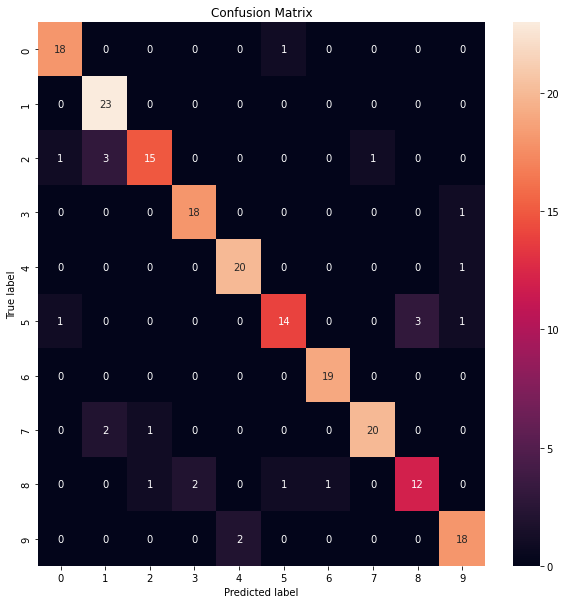

In [ ]:
# Create a plot for confusion matrix with label
# For confusion matrix you can use sklearn confusion matrix function
# Write your code below this
cmknn = confusion_matrix(Y_test, Y_hat)
print(cmknn)
knn_cm = pd.DataFrame(cmknn, index = range(10), columns =  range(10))
plt.figure(figsize = (10,10))
sn.heatmap(knn_cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()